In [4]:
import pandas as pd

In [1]:
server ='phpmyadmin.laptrinhphp.net'
db = 'gd_salesdb'
username = 'hv'
pwd = '123456'

In [2]:
connection_string = "mysql+pymysql://{user}:{password}@{host}/{database}?charset=UTF8". \
    format(user=username, password=pwd, host=server, database=db)

In [3]:
from sqlalchemy.engine import create_engine
conn = create_engine(connection_string)

In [5]:
sql = 'select * from orders limit 5'
df = pd.read_sql(sql, conn)

In [6]:
df

,Id,OrderDate,OrderNumber,CustomerId,TotalAmount
0,1,2012-07-04,542378,85,440.0
1,2,2012-07-05,542379,79,1863.4
2,3,2012-07-08,542380,34,1813.0
3,4,2012-07-08,542381,84,670.8
4,5,2012-07-09,542382,76,3730.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Id           5 non-null      int64         
 1   OrderDate    5 non-null      datetime64[ns]
 2   OrderNumber  5 non-null      object        
 3   CustomerId   5 non-null      int64         
 4   TotalAmount  5 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 328.0+ bytes


In [8]:
# doc cac don dat hang trong nam 2012
# nhom theo id khach hang va dem so don dat hang
# ve barplot cho 5 khach hang co nhieu don dat hang nhat

In [9]:
sql = 'select * from orders where year(orderdate)=2012'
df = pd.read_sql(sql, conn)

In [10]:
df.shape

(152, 5)

In [11]:
df.head()

,Id,OrderDate,OrderNumber,CustomerId,TotalAmount
0,1,2012-07-04,542378,85,440.0
1,2,2012-07-05,542379,79,1863.4
2,3,2012-07-08,542380,34,1813.0
3,4,2012-07-08,542381,84,670.8
4,5,2012-07-09,542382,76,3730.0


In [17]:
df.groupby('CustomerId').size().sort_values(ascending=False).head()

CustomerId
20    6
65    6
63    6
46    5
37    5
dtype: int64

<AxesSubplot:xlabel='CustomerId'>

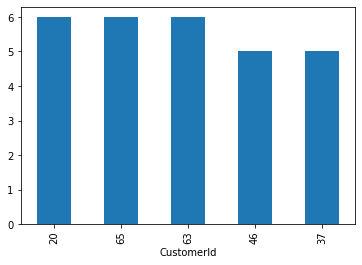

In [16]:
df.groupby('CustomerId').size().sort_values(ascending=False).head().plot.bar()

In [20]:
sql = '''
select customerid, count(*) as dem from orders where year(orderdate)=2012 
group by customerid order by dem desc limit 5
'''
df = pd.read_sql(sql, conn)

In [21]:
df

,customerid,dem
0,65,6
1,63,6
2,20,6
3,46,5
4,37,5
